In [1]:
from MazeEnv_Jeremy import MazeEnv as Maze_env
from ReinforcementLearning_Jeremy import train_q_learning, show_final_solution, train_sarsa, plotting_rewards, show_final_state
import time

In [2]:
env = Maze_env()

Entraînement Q-learning en cours...
Épisode 1/1000 - Récompense : -992.9910002164327
Épisode 2/1000 - Récompense : -960.5799431257333
Épisode 3/1000 - Récompense : -953.7829767151034
Épisode 4/1000 - Récompense : -945.9966280351887
Épisode 5/1000 - Récompense : -967.1835866039245
Épisode 6/1000 - Récompense : -933.5699611980262
Épisode 7/1000 - Récompense : -916.1764040325866
Épisode 8/1000 - Récompense : -908.9926721344045
Épisode 9/1000 - Récompense : -887.3645547208477
Épisode 10/1000 - Récompense : -911.9891303827154
Épisode 11/1000 - Récompense : -657.5118252562708
Épisode 12/1000 - Récompense : -862.9590767208941
Épisode 13/1000 - Récompense : -870.3317495172424
Épisode 14/1000 - Récompense : -858.1677519769202
Épisode 15/1000 - Récompense : -855.1576191660768
Épisode 16/1000 - Récompense : -864.1819176581729
Épisode 17/1000 - Récompense : -469.5263894804086
Épisode 18/1000 - Récompense : -859.7697676075103
Épisode 19/1000 - Récompense : -864.589202833651
Épisode 20/1000 - Récomp

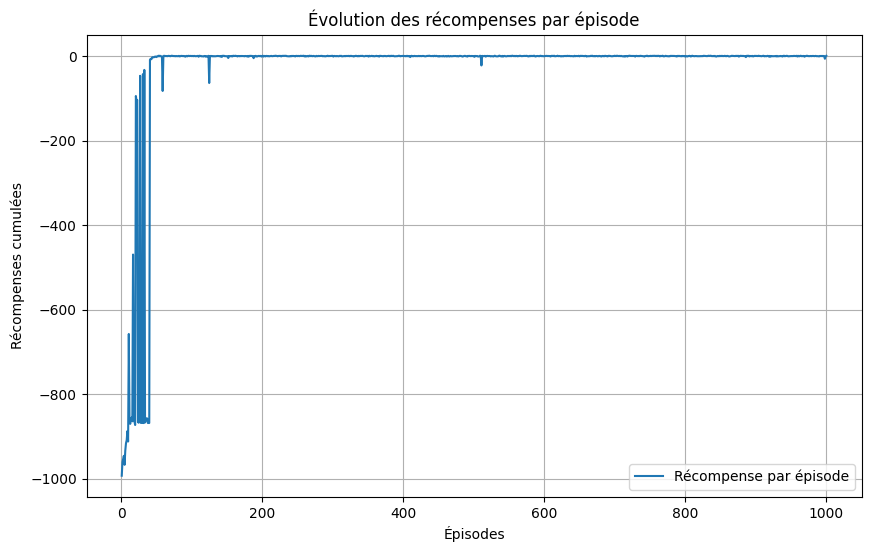

In [3]:
%matplotlib inline
q_table_q, rewards_list_q = train_q_learning(env, show_training=False)
plotting_rewards(rewards_list_q)


In [4]:
print(max(rewards_list_q[5:]))
print(min(rewards_list_q[5:]))

1.0793340192014858
-933.5699611980262


Entraînement SARSA en cours...
Épisode 1/1000 - Récompense : -983.5784910951236
Épisode 2/1000 - Récompense : -969.7855920891816
Épisode 3/1000 - Récompense : -963.3808447640318
Épisode 4/1000 - Récompense : -966.7773746736387
Épisode 5/1000 - Récompense : -951.7853453661851
Épisode 6/1000 - Récompense : -930.3865432008301
Épisode 7/1000 - Récompense : -927.1815247393573
Épisode 8/1000 - Récompense : -709.5410123787963
Épisode 9/1000 - Récompense : -916.3927479953013
Épisode 10/1000 - Récompense : -947.9797685094326
Épisode 11/1000 - Récompense : -885.749887951538
Épisode 12/1000 - Récompense : -890.3546882127407
Épisode 13/1000 - Récompense : -904.7403882712098
Épisode 14/1000 - Récompense : -875.1429021767206
Épisode 15/1000 - Récompense : -857.3609307613455
Épisode 16/1000 - Récompense : -865.7453581786059
Épisode 17/1000 - Récompense : -231.31407910317515
Épisode 18/1000 - Récompense : -853.7645725042099
Épisode 19/1000 - Récompense : -864.9642006264352
Épisode 20/1000 - Récompense

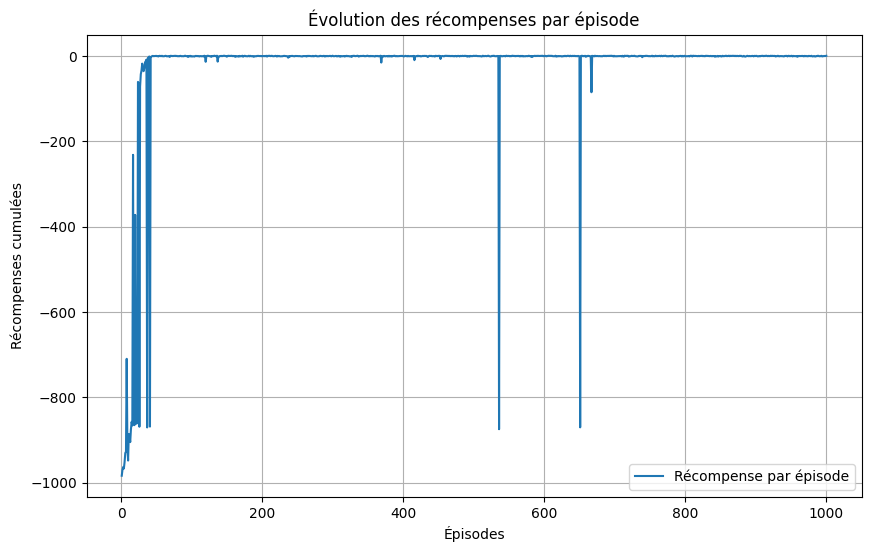

In [5]:
q_table_sarsa, rewards_list_sarsa = train_sarsa(env, show_training=False)
plotting_rewards(rewards_list_sarsa)

In [6]:
print(max(rewards_list_sarsa[5:]))
print(min(rewards_list_sarsa[5:]))

1.0793340192014858
-947.9797685094326


In [9]:
def change_hyperparameters(learnin_type):
    alphas = [0.01, 0.05, 0.1, 0.2]
    gammas = [0.85, 0.9, 0.95, 0.99]
    epsilons = [0.1, 0.2, 0.3, 0.4]
    episodes = [50, 100, 200, 300]

    best_rewards = []
    worst_rewards = []

    # Variables pour suivre le meilleur entraînement
    best_overall_reward = float(-500)  # Initialise avec la valeur la plus basse possible
    best_parameters = None
    best_q_table = None

    start_time = time.time()

    for alpha in alphas:
        for gamma in gammas:
            for epsilon in epsilons:
                for episode in episodes:
                    if learnin_type == 'Q':
                        q_table, rewards_list = train_q_learning(env, alpha=alpha, gamma=gamma, epsilon=epsilon, episodes=episode, show_training=False)
                    elif learnin_type == 'SARSA':
                        q_table, rewards_list = train_sarsa(env, alpha=alpha, gamma=gamma, epsilon=epsilon, episodes=episode, show_training=False)
                    else:
                        print("Invalid learning type")
                        break

                    # Sauvegarder les récompenses
                    current_best_reward = max(rewards_list[5:])
                    current_worst_reward = min(rewards_list[5:])
                    best_rewards.append(current_best_reward)
                    worst_rewards.append(current_worst_reward)

                    # Mettre à jour les meilleurs paramètres
                    if current_best_reward > best_overall_reward:
                        best_overall_reward = current_best_reward
                        best_parameters = {
                            'alpha': alpha,
                            'gamma': gamma,
                            'epsilon': epsilon,
                            'episodes': episode,
                            'reward': best_overall_reward
                        }
                        best_q_table = q_table

    total_time = time.time() - start_time
    print(f"Total time: {total_time}")
    print(f"Best parameters: {best_parameters}")

    return best_rewards, worst_rewards, best_parameters, best_q_table

In [11]:
learnin_type = 'q'
best_rewards_q, worst_rewards_q, best_parameters_q, best_q_table_q = change_hyperparameters('Q')

Entraînement Q-learning en cours...
Épisode 1/50 - Récompense : -727.9300676257723
Épisode 2/50 - Récompense : -905.7783348623703
Épisode 3/50 - Récompense : -858.169431866081
Épisode 4/50 - Récompense : -873.5402175738254
Épisode 5/50 - Récompense : -891.3503199333416


KeyboardInterrupt: 

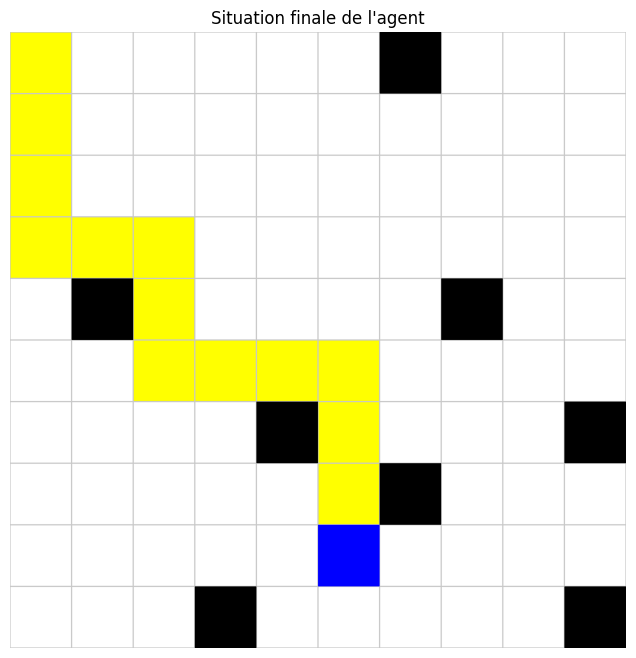

In [10]:
show_final_solution(env, best_q_table_q, learnin_type)
show_final_state(learnin_type)

In [11]:
learnin_type = 'sarsa'
best_rewards_sarsa, worst_rewards_sarsa, best_parameters_sarsa, best_q_table_sarsa = change_hyperparameters('SARSA')

Total time: 6.123089790344238
Best parameters: {'alpha': 0.2, 'gamma': 0.9, 'epsilon': 0.4, 'episodes': 300, 'reward': np.float64(5.947942460873602)}


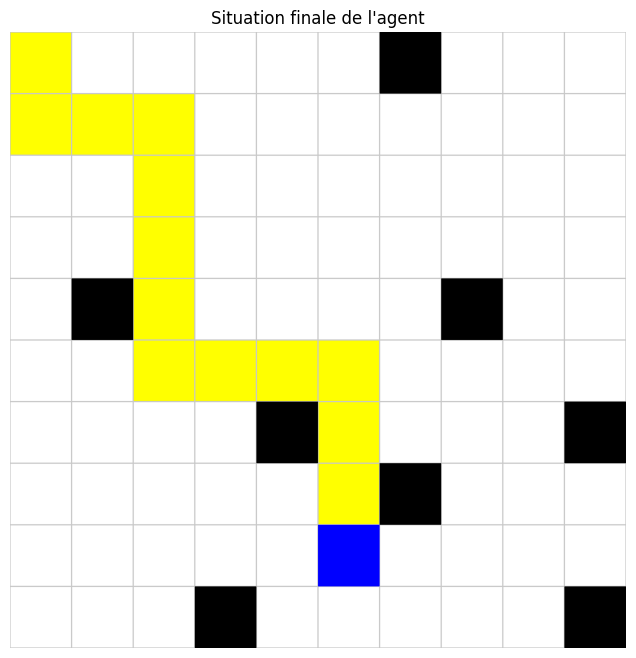

In [13]:
show_final_solution(env, best_q_table_sarsa, learnin_type)
show_final_state(learnin_type)